In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
import datetime
import matplotlib.cm as cm
pd.options.display.max_columns = 1000


Populating the interactive namespace from numpy and matplotlib


In [8]:
orgcrim = pd.read_csv('organized_crime.csv', index_col=0)

In [9]:
len(orgcrim)

1629

In [10]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6, Spectral8, Category20, Spectral3
from bokeh.transform import factor_cmap
from bokeh.core.properties import value

In [11]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [12]:
prost = pd.read_csv('clean_2010_2017.csv', index_col=0)
prost['fda'] = pd.to_datetime(prost.fda)
prost['dispdt'] = pd.to_datetime(prost.dispdt)

In [13]:
len(prost)

16287

In [14]:
dismiss= prost[prost.disposition == 'DISMISSED']
not_dismiss= prost[prost.disposition != 'DISMISSED']


In [15]:
#Which day of the week is most popular for disposition date
d= prost.disptdayofweek.value_counts()
disp_dow = pd.DataFrame()
disp_dow['day'] = d.index
disp_dow['count'] = d.values
disp_dow =disp_dow.sort_values('day')
disp_dow

,day,count
0,0.0,4120
4,1.0,2603
3,2.0,2874
1,3.0,3335
2,4.0,3191


In [16]:
#Which days of the week is most popular for filing date
f = prost.filedayofweek.value_counts()
file_dow = pd.DataFrame()
file_dow['day'] = f.index
file_dow['count'] = f.values
file_dow = file_dow.sort_values('day')
file_dow

,day,count
5,0,1180
2,1,2769
1,2,3741
0,3,4079
3,4,2737
4,5,1208
6,6,573


In [17]:
#  Monday=0, Sunday=6
day_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

In [18]:
disp_dow = disp_dow.replace({"day": day_dict})
file_dow = file_dow.replace({"day": day_dict})

In [19]:
disp_dow

,day,count
0,Monday,4120
4,Tuesday,2603
3,Wednesday,2874
1,Thursday,3335
2,Friday,3191


In [20]:
file_dow

,day,count
5,Monday,1180
2,Tuesday,2769
1,Wednesday,3741
0,Thursday,4079
3,Friday,2737
4,Saturday,1208
6,Sunday,573


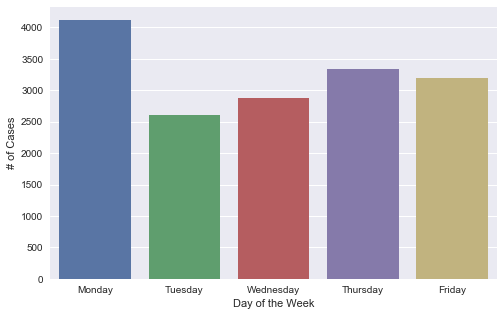

In [21]:
#disp_dow.plot(x= 'day', kind='bar', title = "Cases by Disposition Day of Week")
sns.set(rc={'figure.figsize':(8,5)})

fig = sns.barplot(x = 'day', y = 'count', 
                  data = disp_dow)
fig.set(xlabel='Day of the Week', ylabel='# of Cases')
plt.show()

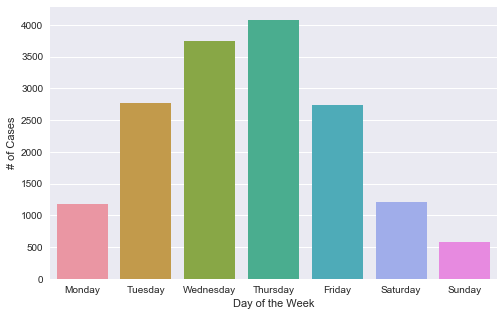

In [22]:
#file_dow.plot(x= 'day', kind='bar', title = "Cases by Filing Day of Week")
sns.set(rc={'figure.figsize':(8,5)})

fig2 = sns.barplot(x = 'day', y = 'count', 
                  data = file_dow)
fig2.set(xlabel='Day of the Week', ylabel='# of Cases')
plt.show()

In [23]:
prost.cas.isnull().values.any()

False

In [24]:
tots = prost.cas.groupby(prost.fda.dt.year).agg(['count'])
tots

,count
fda,
2010,2588
2011,2079
2012,2431
2013,2426
2014,2074
2015,2041
2016,1604
2017,1044


In [25]:
caseplot = figure(title="Prostitution Cases in Harris County 2010-2017", x_axis_label='Year',  y_axis_label='# of Cases', y_range=[0,3000])

# add a line with legend, line color, and line thickness
caseplot.line(tots.index, tots['count'], line_color="blue", line_width=2)

caseplot.circle(tots.index, tots['count'], size=10, fill_color="orange")

# output to static HTML file. 
#output_file("numberofcases.html", mode="inline")

# show this figure in the default web browser
show(caseplot)

In [26]:
sex = prost.groupby([prost.fda.dt.year, 'def_sex']).size().unstack()
sex

def_sex,F,M
fda,,
2010,1986,596
2011,1671,406
2012,1935,495
2013,1808,616
2014,1466,607
2015,1241,799
2016,1271,333
2017,821,223


In [27]:
caseplot = figure(title="Prostitution Cases in Harris County 2010-2017", x_axis_label='Year',  
                  y_axis_label='# of Cases', y_range=[0,2500])

# add a line with legend, line color, and line thickness
caseplot.line(sex.index, sex['M'], line_color="blue", line_width=2, legend='Male')
caseplot.line(sex.index, sex['F'], line_color="red", line_width=2, legend='Female')

#caseplot.circle(tots.index, tots['count'], size=10, fill_color="orange")

# output to static HTML file. 
output_file("numberofcases_sex.html", mode="inline")

# show this figure in the default web browser
show(caseplot)

In [28]:
agency_ct = prost.copy()

In [29]:
agency_ct.comp_agency[(agency_ct.comp_agency != 'HOUSTON POLICE DEPARTMENT')&(agency_ct.comp_agency != 'SHERIFFS DEPARTMENT HARRIS COUNTY')&(agency_ct.comp_agency != 'METRO P. D. CITY OF HOUSTON')&(agency_ct.comp_agency != 'CONSTABLE   PCT 1')&(agency_ct.comp_agency != 'WEBSTER POLICE DEPARTMENT')&(agency_ct.comp_agency != 'CONSTABLE   PCT 4')] = 'OTHER'

C:\Users\Lara\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
agency_ct = agency_ct.comp_agency.value_counts()

In [31]:
print(agency_ct)

HOUSTON POLICE DEPARTMENT            13892
SHERIFFS DEPARTMENT HARRIS COUNTY     1270
METRO P. D. CITY OF HOUSTON            328
OTHER                                  284
CONSTABLE   PCT 1                      262
WEBSTER POLICE DEPARTMENT              142
CONSTABLE   PCT 4                      109
Name: comp_agency, dtype: int64


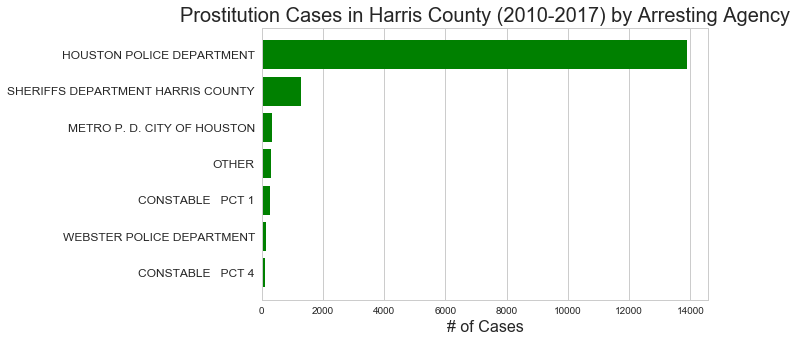

In [32]:
sns.set(style="whitegrid")
#plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(agency_ct))

ax.barh(y_pos, agency_ct.values, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(agency_ct.index, fontsize= 12)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('# of Cases', fontsize = 16)
ax.set_title('Prostitution Cases in Harris County (2010-2017) by Arresting Agency', fontsize = 20)
ax.grid(False)
ax.xaxis.grid()

plt.show()
fig.savefig('agency.png')


In [33]:
'''#Horizontal bar graph (using Bokeh) of the numbers of cases for each agency
ag_cases= agency_ct
agency = list(ag_cases.index)

source = ColumnDataSource(data=dict(agency=agency, ag_cases=ag_cases))

p = figure(y_range=agency, plot_height=500, plot_width=900, title="Prostitution Cases by Agency (2010-2017)",x_axis_label='Number of Cases filed from 2010-2017',
           toolbar_location=None, tools="")

p.hbar(y='agency', right='ag_cases', height=0.5, color='color', legend="agency", source=source, 
       line_color='white', fill_color=factor_cmap('agency', palette=Spectral8, factors=agency))

factor_cmap('agency', palette=Spectral8, factors=agency)

p.xgrid.grid_line_color = None
p.x_range.start = 0
p.x_range.end = 15000
#p.legend.orientation = "vertical"
#p.legend.location = "top_right"
p.title.text_font_size = '16pt'
#p.xaxis.axis_label_text_font_size = "20pt"
#p.yaxis.axis_label_text_font_size = "20pt"

# output to static HTML file. 
output_file("agencies.html", mode="inline")

# show this figure in the default web browser
show(p)
'''

'#Horizontal bar graph (using Bokeh) of the numbers of cases for each agency\nag_cases= agency_ct\nagency = list(ag_cases.index)\n\nsource = ColumnDataSource(data=dict(agency=agency, ag_cases=ag_cases))\n\np = figure(y_range=agency, plot_height=500, plot_width=900, title="Prostitution Cases by Agency (2010-2017)",x_axis_label=\'Number of Cases filed from 2010-2017\',\n           toolbar_location=None, tools="")\n\np.hbar(y=\'agency\', right=\'ag_cases\', height=0.5, color=\'color\', legend="agency", source=source, \n       line_color=\'white\', fill_color=factor_cmap(\'agency\', palette=Spectral8, factors=agency))\n\nfactor_cmap(\'agency\', palette=Spectral8, factors=agency)\n\np.xgrid.grid_line_color = None\np.x_range.start = 0\np.x_range.end = 15000\n#p.legend.orientation = "vertical"\n#p.legend.location = "top_right"\np.title.text_font_size = \'16pt\'\n#p.xaxis.axis_label_text_font_size = "20pt"\n#p.yaxis.axis_label_text_font_size = "20pt"\n\n# output to static HTML file. \noutput_f

In [34]:
hpd = prost[prost.comp_agency == "HOUSTON POLICE DEPARTMENT"]

In [35]:
hpd_cases = hpd.fda.groupby(hpd.fda.dt.year).agg('count')

In [36]:
hcso = prost[prost.comp_agency == 'SHERIFFS DEPARTMENT HARRIS COUNTY']

In [37]:
hcso_cases = hcso.fda.groupby(hcso.fda.dt.year).agg('count')

In [38]:
metro = prost[prost.comp_agency == 'METRO P. D. CITY OF HOUSTON']

In [39]:
metro_cases = metro.fda.groupby(metro.fda.dt.year).agg('count')

In [40]:
metro_cases[2015]=0
metro_cases[2016]=0
metro_cases[2017]=0

In [41]:
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

# create a new plot with a title and axis labels
plot = figure(title="Prostitution Cases per year by Agency", x_axis_label='Year', x_range=[min(x),max(x)],  y_axis_label='Number of Cases', y_range=[0, 2500])


# add a line of HPD
plot.line(x, hpd_cases, legend="Houston Police Dept", line_color="red", line_width=2)

# add HCSO
plot.line(x, hcso_cases, legend="Harris County Sheriff's Office", line_color="blue", line_width=2)

# add HCSO
plot.line(x, metro_cases, legend="Metro PD - City of Houston", line_color="green", line_width=2)

plot.title.text_font_size = '16pt'
#p.xaxis.axis_label_text_font_size = "20pt"
#p.yaxis.axis_label_text_font_size = "20pt"


output_file("top3.html", mode="inline")

# show this figure in the default web browser
show(plot)

In [42]:
hpd_sex = hpd.groupby([prost.fda.dt.year, 'def_sex']).size().unstack()
hpd_sex['% Cases Female'] = hpd_sex['F']/(hpd_sex['F']+hpd_sex['M'])*100
hpd_sex

def_sex,F,M,% Cases Female
fda,,,
2010,1863,573,76.477833
2011,1451,362,80.033094
2012,1747,433,80.137615
2013,1697,488,77.665904
2014,1232,406,75.213675
2015,1050,511,67.264574
2016,993,268,78.747026
2017,645,160,80.124224


In [43]:
dis_ct = dismiss.cas.groupby(dismiss.fda.dt.year).agg(['count'])

In [44]:
dis_pct = dis_ct/tots*100
dis_pct.columns = ['% Cases Dismissed']
dis_pct

,% Cases Dismissed
fda,
2010,6.761978
2011,8.369408
2012,9.543398
2013,10.676010
2014,16.007715
2015,24.889760
2016,42.019950
2017,48.084291


In [45]:
# DISMISSED cases by race and year
DisRY = dismiss.groupby([dismiss.fda.dt.year, 'def_rac']).size().unstack()
DisRY.columns = ['Asian-DIMISS', 'Black-DISMISS', 'Indian-DISMISS', 'Unknown-DISMISS', 'White-DISMISS']
DisRY

,Asian-DIMISS,Black-DISMISS,Indian-DISMISS,Unknown-DISMISS,White-DISMISS
fda,,,,,
2010,21.0,67.0,NaN,NaN,86.0
2011,30.0,59.0,NaN,1.0,84.0
2012,25.0,99.0,1.0,NaN,106.0
2013,47.0,76.0,3.0,1.0,132.0
2014,51.0,116.0,1.0,2.0,162.0
2015,91.0,190.0,NaN,1.0,225.0
2016,146.0,240.0,3.0,4.0,280.0
2017,86.0,191.0,NaN,10.0,215.0


In [46]:
#Race/year totals
rac_year = prost.groupby([prost.fda.dt.year, 'def_rac']).size().unstack()
rac_year.columns = ['Asian-total', 'Black-total', 'Indian-total', 'Unknown-total', 'White-total']
rac_year

,Asian-total,Black-total,Indian-total,Unknown-total,White-total
fda,,,,,
2010,100.0,1329.0,NaN,7.0,1146.0
2011,114.0,1002.0,2.0,11.0,948.0
2012,130.0,1155.0,4.0,6.0,1134.0
2013,149.0,1178.0,4.0,11.0,1082.0
2014,128.0,1018.0,3.0,8.0,916.0
2015,207.0,854.0,1.0,5.0,973.0
2016,232.0,687.0,4.0,13.0,666.0
2017,113.0,427.0,NaN,11.0,493.0


In [47]:
g= pd.DataFrame()
g['total cases'] = tots['count']
g['total cases dismissed'] = prost[prost.disposition == 'DISMISSED'].groupby(prost.fda.dt.year).size()
g['All Races %Dis'] = (prost[prost.disposition == 'DISMISSED'].groupby(prost.fda.dt.year).size() /tots['count'])*100

g['African American-total'] = rac_year['Black-total']
g['% cases African American'] = (rac_year['Black-total']/tots['count'])*100
g['African American-DISMISS ct'] = DisRY['Black-DISMISS']
g['African American %Dis'] = (DisRY['Black-DISMISS']/rac_year['Black-total'])*100

g['White-total'] = rac_year['White-total']
g['% cases White'] = (rac_year['White-total']/tots['count'])*100
g['White-DISMISS ct'] = DisRY['White-DISMISS']
g['White %Dis'] = (DisRY['White-DISMISS']/rac_year['White-total'])*100

g['Asian-total'] = rac_year['Asian-total']
g['% cases Asian'] = (rac_year['Asian-total']/tots['count'])*100
g['Asian-DIMISS ct'] = DisRY['Asian-DIMISS']
g['Asian %Dis'] = (DisRY['Asian-DIMISS']/rac_year['Asian-total'])*100

g['Indian-total'] = rac_year['Indian-total']
g['% cases Indian'] = (rac_year['Indian-total']/tots['count'])*100
g['Indian-DISMISS ct'] = DisRY['Indian-DISMISS']
g['Indian %Dis'] = (DisRY['Indian-DISMISS']/rac_year['Indian-total'])*100

g['Unknown-total'] = rac_year['Unknown-total']
g['% cases Unknown Race'] = (rac_year['Unknown-total']/tots['count'])*100
g['Unknown-DISMISS ct'] = DisRY['Unknown-DISMISS']
g['Unknown %Dis'] = (DisRY['Unknown-DISMISS']/rac_year['Unknown-total'])*100


In [48]:
g

,total cases,total cases dismissed,All Races %Dis,African American-total,% cases African American,African American-DISMISS ct,African American %Dis,White-total,% cases White,White-DISMISS ct,White %Dis,Asian-total,% cases Asian,Asian-DIMISS ct,Asian %Dis,Indian-total,% cases Indian,Indian-DISMISS ct,Indian %Dis,Unknown-total,% cases Unknown Race,Unknown-DISMISS ct,Unknown %Dis
fda,,,,,,,,,,,,,,,,,,,,,,,
2010,2588,175,6.761978,1329.0,51.352396,67.0,5.041384,1146.0,44.281298,86.0,7.504363,100.0,3.863988,21.0,21.000000,NaN,NaN,NaN,NaN,7.0,0.270479,NaN,NaN
2011,2079,174,8.369408,1002.0,48.196248,59.0,5.888224,948.0,45.598846,84.0,8.860759,114.0,5.483405,30.0,26.315789,2.0,0.096200,NaN,NaN,11.0,0.529101,1.0,9.090909
2012,2431,232,9.543398,1155.0,47.511312,99.0,8.571429,1134.0,46.647470,106.0,9.347443,130.0,5.347594,25.0,19.230769,4.0,0.164541,1.0,25.000000,6.0,0.246812,NaN,NaN
2013,2426,259,10.676010,1178.0,48.557296,76.0,6.451613,1082.0,44.600165,132.0,12.199630,149.0,6.141797,47.0,31.543624,4.0,0.164880,3.0,75.000000,11.0,0.453421,1.0,9.090909
2014,2074,332,16.007715,1018.0,49.083896,116.0,11.394892,916.0,44.165863,162.0,17.685590,128.0,6.171649,51.0,39.843750,3.0,0.144648,1.0,33.333333,8.0,0.385728,2.0,25.000000
2015,2041,508,24.889760,854.0,41.842234,190.0,22.248244,973.0,47.672709,225.0,23.124358,207.0,10.142087,91.0,43.961353,1.0,0.048996,NaN,NaN,5.0,0.244978,1.0,20.000000
2016,1604,674,42.019950,687.0,42.830424,240.0,34.934498,666.0,41.521197,280.0,42.042042,232.0,14.463840,146.0,62.931034,4.0,0.249377,3.0,75.000000,13.0,0.810474,4.0,30.769231
2017,1044,502,48.084291,427.0,40.900383,191.0,44.730679,493.0,47.222222,215.0,43.610548,113.0,10.823755,86.0,76.106195,NaN,NaN,NaN,NaN,11.0,1.053640,10.0,90.909091


In [49]:
just_sex = prost.groupby([prost.fda.dt.year, 'def_sex']).size().unstack()

In [50]:
just_sex

def_sex,F,M
fda,,
2010,1986,596
2011,1671,406
2012,1935,495
2013,1808,616
2014,1466,607
2015,1241,799
2016,1271,333
2017,821,223


In [51]:
just_sex['F%'] = (just_sex['F']/tots['count'])*100
just_sex['M%'] = (just_sex['M']/tots['count'])*100

In [52]:
just_sex

def_sex,F,M,F%,M%
fda,,,,
2010,1986,596,76.738794,23.029366
2011,1671,406,80.375180,19.528620
2012,1935,495,79.596874,20.361991
2013,1808,616,74.525969,25.391591
2014,1466,607,70.684667,29.267117
2015,1241,799,60.803528,39.147477
2016,1271,333,79.239401,20.760599
2017,821,223,78.639847,21.360153


In [53]:
dis_sex = dismiss.groupby([dismiss.fda.dt.year, 'def_sex']).size().unstack()

In [54]:
just_sex['F dismiss'] = dis_sex['F']
just_sex['M dismiss'] = dis_sex['M']

In [55]:
just_sex

def_sex,F,M,F%,M%,F dismiss,M dismiss
fda,,,,,,
2010,1986,596,76.738794,23.029366,119,55
2011,1671,406,80.375180,19.528620,122,52
2012,1935,495,79.596874,20.361991,154,77
2013,1808,616,74.525969,25.391591,191,68
2014,1466,607,70.684667,29.267117,234,98
2015,1241,799,60.803528,39.147477,341,166
2016,1271,333,79.239401,20.760599,592,82
2017,821,223,78.639847,21.360153,407,95


In [56]:
just_sex['%F dismissed'] = (dis_sex['F']/just_sex['F'])*100
just_sex['%M dismissed'] = (dis_sex['M']/just_sex['M'])*100

In [57]:
just_sex['F not dis'] = just_sex['F']-just_sex['F dismiss']
just_sex['M not dis'] = just_sex['M']-just_sex['M dismiss']
just_sex.columns = ['# of Female Cases', "# of Male Cases", '% Female of All Cases', '% Male of All Cases', '# Female Cases Dismissed', '# of Male Cases Dismissed', '% of all Female Cases Dismissed', '% of all Male Cases Dismissed', '# F not dis', '# M not dis']
just_sex

,# of Female Cases,# of Male Cases,% Female of All Cases,% Male of All Cases,# Female Cases Dismissed,# of Male Cases Dismissed,% of all Female Cases Dismissed,% of all Male Cases Dismissed,# F not dis,# M not dis
fda,,,,,,,,,,
2010,1986,596,76.738794,23.029366,119,55,5.991944,9.228188,1867,541
2011,1671,406,80.375180,19.528620,122,52,7.301017,12.807882,1549,354
2012,1935,495,79.596874,20.361991,154,77,7.958656,15.555556,1781,418
2013,1808,616,74.525969,25.391591,191,68,10.564159,11.038961,1617,548
2014,1466,607,70.684667,29.267117,234,98,15.961801,16.144975,1232,509
2015,1241,799,60.803528,39.147477,341,166,27.477840,20.775970,900,633
2016,1271,333,79.239401,20.760599,592,82,46.577498,24.624625,679,251
2017,821,223,78.639847,21.360153,407,95,49.573691,42.600897,414,128


In [58]:
sex_dis = pd.DataFrame()
sex_dis['% of all Female Cases Dismissed'] = just_sex['% of all Female Cases Dismissed']
sex_dis['% of all Male Cases Dismissed'] = just_sex['% of all Male Cases Dismissed']
sex_dis

,% of all Female Cases Dismissed,% of all Male Cases Dismissed
fda,,
2010,5.991944,9.228188
2011,7.301017,12.807882
2012,7.958656,15.555556
2013,10.564159,11.038961
2014,15.961801,16.144975
2015,27.477840,20.775970
2016,46.577498,24.624625
2017,49.573691,42.600897


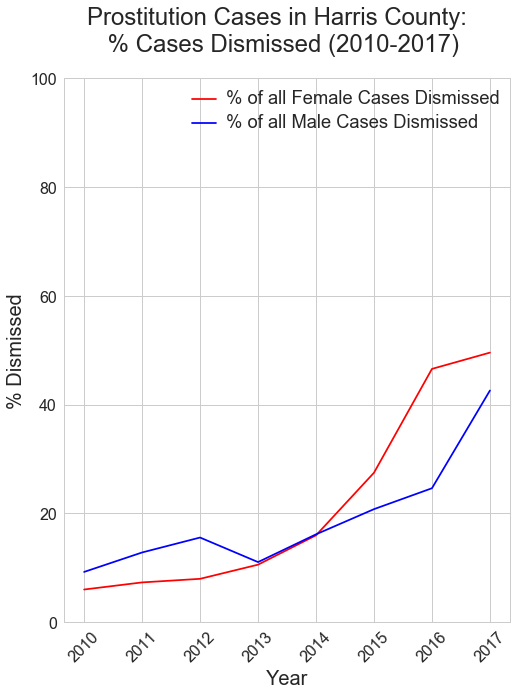

In [176]:
fig = plt.figure(figsize=(8,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

sex_dis[['% of all Female Cases Dismissed']].plot(kind='line', color= 'red', ax=ax) #, width=width, position=2)
sex_dis[['% of all Male Cases Dismissed']].plot(kind='line', color = 'blue', ax=ax) #, width=width, position=0.5)

#ax.set_xlim(-1, 3)
ax.set_ylim(0, 100)

plt.ylabel('% Dismissed', fontsize= 20)
plt.xlabel('Year', fontsize = 20)

plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

fig.suptitle('Prostitution Cases in Harris County: \n % Cases Dismissed (2010-2017)', fontsize=24)

setp(gca().get_legend().get_texts(), fontsize='small')

plt.show()
fig.savefig('dismiss_sex.png')

In [59]:
sex= pd.DataFrame()
sex['F not dismissed'] = just_sex['# F not dis']
sex['F dismissed'] = just_sex['# Female Cases Dismissed']
sex['M not dismissed'] = just_sex['# M not dis']
sex['M dismissed'] = just_sex['# of Male Cases Dismissed']
sex


,F not dismissed,F dismissed,M not dismissed,M dismissed
fda,,,,
2010,1867,119,541,55
2011,1549,122,354,52
2012,1781,154,418,77
2013,1617,191,548,68
2014,1232,234,509,98
2015,900,341,633,166
2016,679,592,251,82
2017,414,407,128,95


In [60]:
men_v_women =  pd.concat([just_sex['# of Female Cases'], just_sex['# of Male Cases']], axis=1)

[Text(0,0.5,'# of Cases'), Text(0.5,0,'Year')]

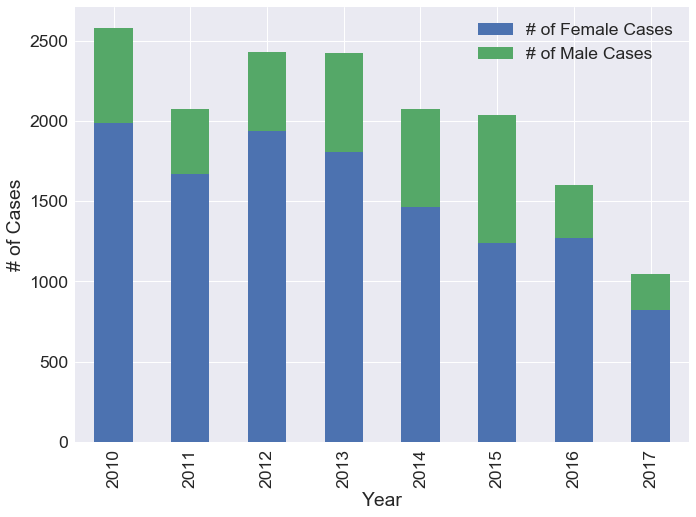

In [61]:
#Dismissals by Year and Gender
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.75)
sexplt = men_v_women.set_index(men_v_women.index).plot(kind='bar', stacked=True)
sexplt.set(xlabel='Year', ylabel='# of Cases')
#ax.text(x,y, "%d%%" % (percentages[i,j]), ha='center')

In [62]:
sex_prcts = pd.DataFrame()
sex_prcts['% F (of total)']= (just_sex['# of Female Cases']/(just_sex['# of Female Cases']+just_sex['# of Male Cases'])*100)
sex_prcts['% M (of total)']= (just_sex['# of Male Cases']/(just_sex['# of Female Cases']+just_sex['# of Male Cases'])*100)
sex_prcts['%F dismissed (of all F)']= (just_sex['# Female Cases Dismissed']/just_sex['# of Female Cases'])*100
sex_prcts['%M dismissed (of all M)']= (just_sex['# of Male Cases Dismissed']/just_sex['# of Male Cases'])*100
sex_prcts

,% F (of total),% M (of total),%F dismissed (of all F),%M dismissed (of all M)
fda,,,,
2010,76.917119,23.082881,5.991944,9.228188
2011,80.452576,19.547424,7.301017,12.807882
2012,79.629630,20.370370,7.958656,15.555556
2013,74.587459,25.412541,10.564159,11.038961
2014,70.718765,29.281235,15.961801,16.144975
2015,60.833333,39.166667,27.477840,20.775970
2016,79.239401,20.760599,46.577498,24.624625
2017,78.639847,21.360153,49.573691,42.600897


In [63]:
# Dimissals by Race, Gender and Year

In [64]:
not_dismiss['dismiss'] = 'NOT dismissed'
dismiss['dismiss'] = 'dismissed'

C:\Users\Lara\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lara\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
#create separate DFs for each race/dismissal (dropping races "I" and "U")
dis_A = dismiss[dismiss.def_rac == "A"]
dis_B = dismiss[dismiss.def_rac == "B"]
dis_W = dismiss[dismiss.def_rac == "W"]
notdis_A = not_dismiss[not_dismiss.def_rac == "A"]
notdis_B = not_dismiss[not_dismiss.def_rac == "B"]
notdis_W = not_dismiss[not_dismiss.def_rac == "W"]

In [66]:
dis_A_sex = dis_A.groupby([dis_A.fda.dt.year, 'def_sex']).size().unstack()
dis_A_sex = dis_A_sex.rename(index=str, columns={"F": "Asian Female dismissed", "M": "Asian Male dismissed"})

notdis_A_sex = notdis_A.groupby([notdis_A.fda.dt.year, 'def_sex']).size().unstack()
notdis_A_sex = notdis_A_sex.rename(index=str, columns={"F": "Asian Female NOT dismissed", "M": "Asian Male NOT dismissed"})

asian = pd.concat([dis_A_sex, notdis_A_sex], axis=1)
asian

def_sex,Asian Female dismissed,Asian Male dismissed,Asian Female NOT dismissed,Asian Male NOT dismissed
fda,,,,
2010,20,1,75.0,4.0
2011,24,6,75.0,9.0
2012,24,1,95.0,10.0
2013,44,3,82.0,20.0
2014,48,3,71.0,6.0
2015,82,9,104.0,12.0
2016,145,1,83.0,3.0
2017,81,5,27.0,NaN


In [67]:
dis_B_sex = dis_B.groupby([dis_B.fda.dt.year, 'def_sex']).size().unstack()
dis_B_sex = dis_B_sex.rename(index=str, columns={"F": "African American Female dismissed", "M": "African American Male dismissed"})
notdis_B_sex = notdis_B.groupby([notdis_B.fda.dt.year, 'def_sex']).size().unstack()
notdis_B_sex = notdis_B_sex.rename(index=str, columns={"F": "African American Female NOT dismissed", "M": "African American Male NOT dismissed"})
black = pd.concat([dis_B_sex, notdis_B_sex], axis=1)
black

def_sex,African American Female dismissed,African American Male dismissed,African American Female NOT dismissed,African American Male NOT dismissed
fda,,,,
2010,42,25,959,303
2011,39,20,730,213
2012,67,32,868,188
2013,64,12,849,253
2014,76,40,620,282
2015,139,51,413,251
2016,210,30,281,166
2017,152,39,165,71


In [68]:
dis_W_sex = dis_W.groupby([dis_W.fda.dt.year, 'def_sex']).size().unstack()
dis_W_sex = dis_W_sex.rename(index=str, columns={"F": "White Female dismissed", "M": "White Male dismissed"})
notdis_W_sex = notdis_W.groupby([notdis_W.fda.dt.year, 'def_sex']).size().unstack()
notdis_W_sex = notdis_W_sex.rename(index=str, columns={"F": "White Female NOT dismissed", "M": "White Male NOT dismissed"})
white = pd.concat([dis_W_sex, notdis_W_sex], axis=1)
white

def_sex,White Female dismissed,White Male dismissed,White Female NOT dismissed,White Male NOT dismissed
fda,,,,
2010,57,29,826,234
2011,58,26,735,129
2012,62,44,810,218
2013,81,51,677,273
2014,108,54,534,220
2015,120,105,380,368
2016,230,50,308,78
2017,164,51,222,56


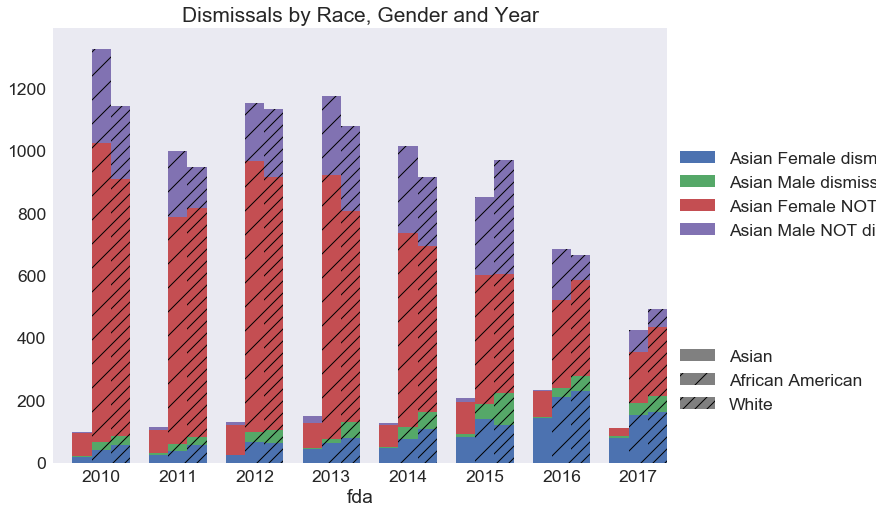

In [69]:
def plot_clustered_stacked(dfall, labels=None, title="Dismissals by Race, Gender and Year",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe


# Then, just call :
plot_clustered_stacked([asian, black, white],["Asian", "African American", "White"])

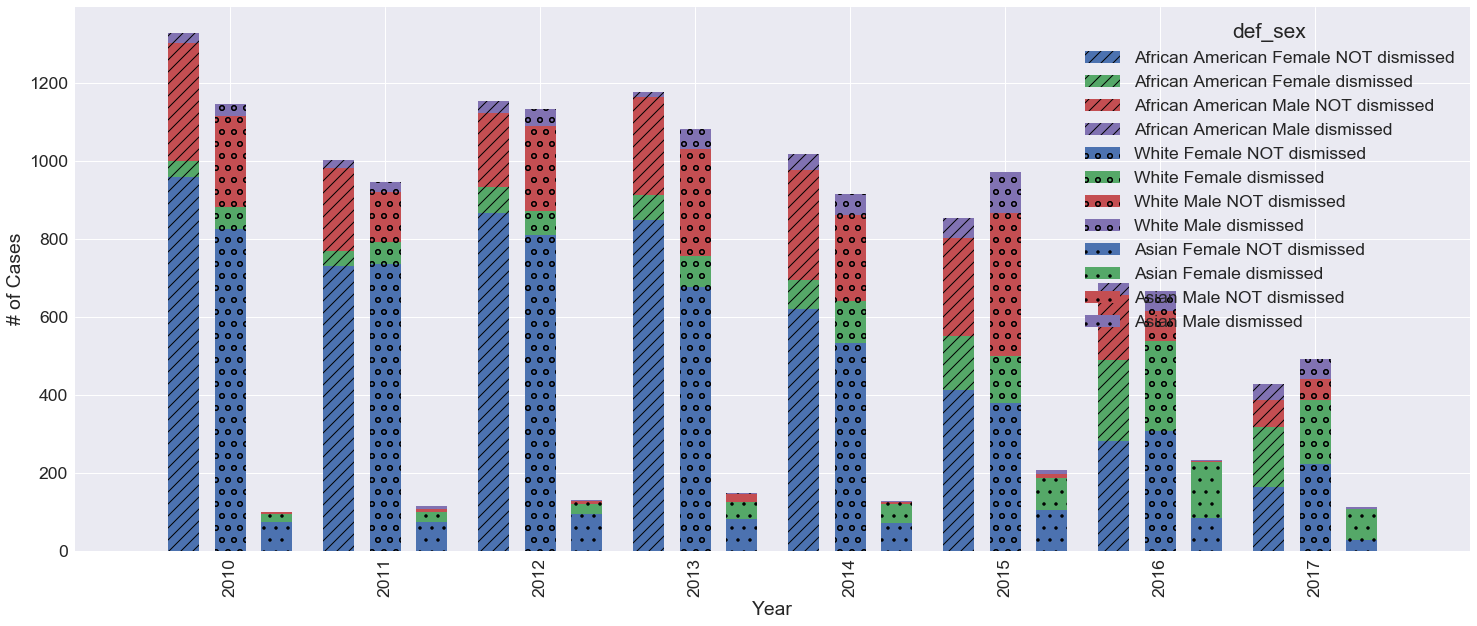

In [70]:
fig = plt.figure(figsize=(25,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.2

black[['African American Female NOT dismissed','African American Female dismissed', 'African American Male NOT dismissed','African American Male dismissed']].plot(kind='bar', stacked=True, ax=ax, width=width, position=2, hatch ="//")
white[['White Female NOT dismissed','White Female dismissed', 'White Male NOT dismissed','White Male dismissed']].plot(kind='bar', stacked=True, ax=ax, width=width, position=0.5, hatch ="o")
asian[['Asian Female NOT dismissed','Asian Female dismissed', 'Asian Male NOT dismissed','Asian Male dismissed']].plot(kind='bar', stacked=True, ax=ax, width=width, position=-1, hatch =".")

ax.set_xlim(-1, 8)

ax.set_ylabel('# of Cases')
ax.set_xlabel('Year')

#params = {'legend.fontsize': 20,
#          'legend.handlelength': 2}
#plt.rcParams.update(params)

plt.show()

In [71]:
wht_pct = pd.DataFrame()
wht_pct['% White Male Dismissed']= white['White Male dismissed']/(white['White Male dismissed']+white['White Male NOT dismissed'])*100
wht_pct['% White Female Dismissed']= white['White Female dismissed']/(white['White Female dismissed']+white['White Female NOT dismissed'])*100
wht_pct

,% White Male Dismissed,% White Female Dismissed
fda,,
2010,11.026616,6.455266
2011,16.774194,7.313997
2012,16.793893,7.110092
2013,15.740741,10.686016
2014,19.708029,16.822430
2015,22.198732,24.000000
2016,39.062500,42.750929
2017,47.663551,42.487047


In [72]:
b_pct = pd.DataFrame()
b_pct['% African American Male Dismissed']= black['African American Male dismissed']/(black['African American Male dismissed']+black['African American Male NOT dismissed'])*100
b_pct['% African American Female Dismissed']= black['African American Female dismissed']/(black['African American Female dismissed']+black['African American Female NOT dismissed'])*100
b_pct

,% African American Male Dismissed,% African American Female Dismissed
fda,,
2010,7.621951,4.195804
2011,8.583691,5.071521
2012,14.545455,7.165775
2013,4.528302,7.009858
2014,12.422360,10.919540
2015,16.887417,25.181159
2016,15.306122,42.769857
2017,35.454545,47.949527


In [73]:
a_pct = pd.DataFrame()
a_pct['% Asian Male Dismissed']= asian['Asian Male dismissed']/(asian['Asian Male dismissed']+asian['Asian Male NOT dismissed'])*100
a_pct['% Asian Female Dismissed']= asian['Asian Female dismissed']/(asian['Asian Female dismissed']+asian['Asian Female NOT dismissed'])*100
a_pct


,% Asian Male Dismissed,% Asian Female Dismissed
fda,,
2010,20.000000,21.052632
2011,40.000000,24.242424
2012,9.090909,20.168067
2013,13.043478,34.920635
2014,33.333333,40.336134
2015,42.857143,44.086022
2016,25.000000,63.596491
2017,NaN,75.000000


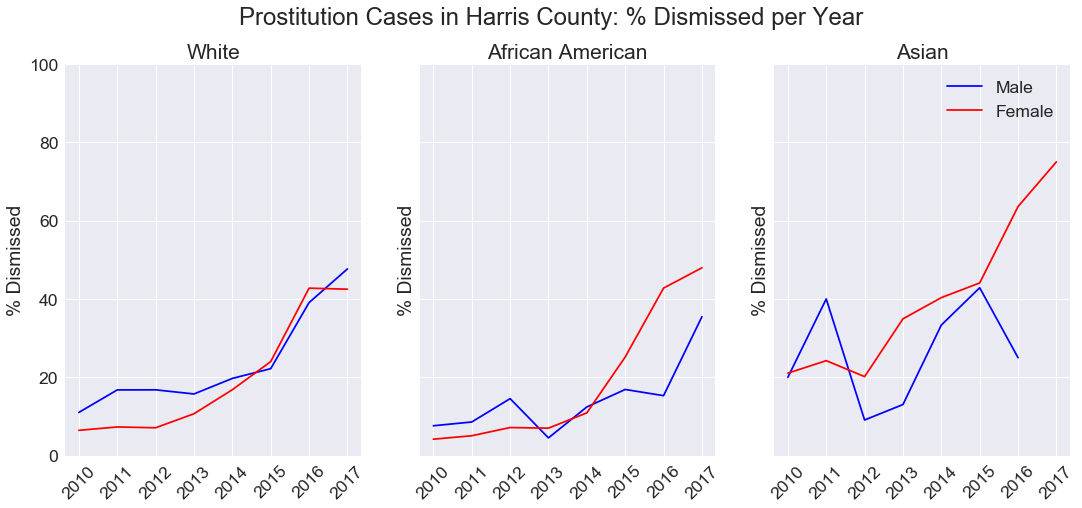

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

axs[0].plot(wht_pct['% White Male Dismissed'], color ='blue')
axs[0].plot(wht_pct['% White Female Dismissed'], color ='red')
axs[0].set(title = 'White', ylabel='% Dismissed')

axs[1].plot(b_pct['% African American Male Dismissed'], color ='blue')
axs[1].plot(b_pct['% African American Female Dismissed'], color ='red')
axs[1].set(title='African American', ylabel='% Dismissed')

axs[2].plot(a_pct['% Asian Male Dismissed'], color ='blue')
axs[2].plot(a_pct['% Asian Female Dismissed'], color ='red')
axs[2].set(title='Asian', ylabel='% Dismissed')

pylab.ylim([0,100])
fig.suptitle('Prostitution Cases in Harris County: % Dismissed per Year', fontsize=24)
fig.autofmt_xdate(rotation =45, ha='center')
plt.gca().legend(('Male','Female'))

fig.savefig('race_gender_dismiss.png')

In [75]:
means = wht_pct.mean()
means = means.append(b_pct.mean())
means = means.append(a_pct.mean())
means

% White Male Dismissed                 23.621032
% White Female Dismissed               19.703222
% African American Male Dismissed      14.418731
% African American Female Dismissed    18.782880
% Asian Male Dismissed                 26.189266
% Asian Female Dismissed               40.425301
dtype: float64

In [76]:
races = prost[(prost.def_rac == 'A')|(prost.def_rac == 'B')|(prost.def_rac == 'W')]
RS_total = races.groupby([races.fda.dt.year,  'def_sex','def_rac']).size().unstack()
RS_total

def_rac         A     B    W
fda  def_sex                
2010 F         95  1001  883
     M          5   328  263
2011 F         99   769  793
     M         15   233  155
2012 F        119   935  872
     M         11   220  262
2013 F        126   913  758
     M         23   265  324
2014 F        119   696  642
     M          9   322  274
2015 F        186   552  500
     M         21   302  473
2016 F        228   491  538
     M          4   196  128
2017 F        108   317  386
     M          5   110  107

In [77]:
RSsum = RS_total.sum()
RSsum

def_rac
A    1173
B    7650
W    7358
dtype: int64

In [78]:
RSsum/int(tots.sum())

def_rac
A    0.072021
B    0.469700
W    0.451771
dtype: float64

In [79]:
A = RS_total['A'].unstack()
B = RS_total['B'].unstack()
W = RS_total['W'].unstack()

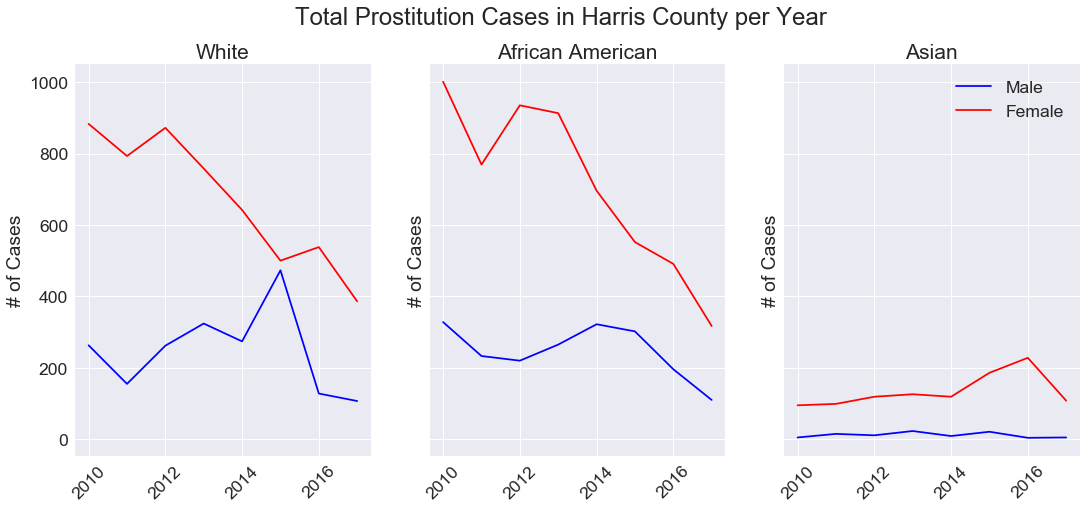

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

axs[0].plot(W['M'], color ='blue')
axs[0].plot(W['F'], color ='red')
axs[0].set(title = 'White', ylabel='# of Cases')

axs[1].plot(B['M'], color ='blue')
axs[1].plot(B['F'], color ='red')
axs[1].set(title='African American', ylabel='# of Cases')

axs[2].plot(A['M'], color ='blue')
axs[2].plot(A['F'], color ='red')
axs[2].set(title='Asian', ylabel='# of Cases')

#pylab.ylim([0,100])
fig.suptitle('Total Prostitution Cases in Harris County per Year', fontsize=24)
fig.autofmt_xdate(rotation =45, ha='center')
plt.gca().legend(('Male','Female'))

fig.savefig('race_gender_totals.png')

In [81]:
just_sex.columns

Index(['# of Female Cases', '# of Male Cases', '% Female of All Cases',
       '% Male of All Cases', '# Female Cases Dismissed',
       '# of Male Cases Dismissed', '% of all Female Cases Dismissed',
       '% of all Male Cases Dismissed', '# F not dis', '# M not dis'],
      dtype='object')

In [82]:
'''
F_pct = (RS_total['F']/(RS_total['F']+RS_total['M'])*100).unstack()
F_pct.columns = ['Asian', 'Black', 'White']
F_pct['Overall'] = just_sex['% Female of All Cases']
F_pct
'''

"\nF_pct = (RS_total['F']/(RS_total['F']+RS_total['M'])*100).unstack()\nF_pct.columns = ['Asian', 'Black', 'White']\nF_pct['Overall'] = just_sex['% Female of All Cases']\nF_pct\n"

In [83]:
'''
plt.plot(F_pct)
plt.ylabel('% cases Female')
plt.legend(('Asian', 'African American', 'White', 'Overall'))
plt.title('% Cases Female by Race')
pylab.ylim([0,100])
plt.show()
'''

"\nplt.plot(F_pct)\nplt.ylabel('% cases Female')\nplt.legend(('Asian', 'African American', 'White', 'Overall'))\nplt.title('% Cases Female by Race')\npylab.ylim([0,100])\nplt.show()\n"

In [84]:
dismiss = dismiss[(dismiss.def_rac == 'A')|(dismiss.def_rac == 'B')|(dismiss.def_rac == 'W')]

RS_dis = dismiss.groupby([dismiss.fda.dt.year, 'def_sex', 'def_rac']).size().unstack()
RS_dis

def_rac         A    B    W
fda  def_sex               
2010 F         20   42   57
     M          1   25   29
2011 F         24   39   58
     M          6   20   26
2012 F         24   67   62
     M          1   32   44
2013 F         44   64   81
     M          3   12   51
2014 F         48   76  108
     M          3   40   54
2015 F         82  139  120
     M          9   51  105
2016 F        145  210  230
     M          1   30   50
2017 F         81  152  164
     M          5   39   51

In [85]:
guilty = races
# Change "Guilty Plea-No Jury" to "Conviction -Plea of Guilty
guilty.disposition[guilty.disposition == 'GUILTY PLEA-NO JURY'] = 'CONVICTION-PLEA OF GUILTY'

not_guilty= guilty[guilty.disposition != 'CONVICTION-PLEA OF GUILTY']
guilty = guilty[guilty.disposition == 'CONVICTION-PLEA OF GUILTY']

notG_A = not_guilty[not_guilty.def_rac =='A']
notG_B = not_guilty[not_guilty.def_rac =='B']
notG_W = not_guilty[not_guilty.def_rac =='W']

G_A = guilty[guilty.def_rac =='A']
G_B = guilty[guilty.def_rac =='B']
G_W = guilty[guilty.def_rac =='W']

guilty_YS_A = G_A.groupby([G_A.fda.dt.year, 'def_sex']).size().unstack()
guilty_YS_A = guilty_YS_A.fillna(0)
guilty_YS_B = G_B.groupby([G_B.fda.dt.year, 'def_sex']).size().unstack()
guilty_YS_W = G_W.groupby([G_W.fda.dt.year, 'def_sex']).size().unstack()

notguilty_YS_A = notG_A.groupby([notG_A.fda.dt.year, 'def_sex']).size().unstack()
notguilty_YS_B = notG_B.groupby([notG_B.fda.dt.year, 'def_sex']).size().unstack()
notguilty_YS_W = notG_W.groupby([notG_W.fda.dt.year, 'def_sex']).size().unstack()

C:\Users\Lara\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lara\Miniconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Lara\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self

In [86]:
guilt_pct_A = guilty_YS_A/(guilty_YS_A+notguilty_YS_A)*100
guilt_pct_B = guilty_YS_B/(guilty_YS_B+notguilty_YS_B)*100
guilt_pct_W = guilty_YS_W/(guilty_YS_W+notguilty_YS_W)*100

In [87]:
guilt_pct_B

def_sex,F,M
fda,,
2010,86.813187,79.573171
2011,87.646294,78.540773
2012,81.818182,62.727273
2013,78.641840,71.320755
2014,73.419540,69.565217
2015,63.405797,55.629139
2016,41.547862,61.734694
2017,26.182965,33.636364


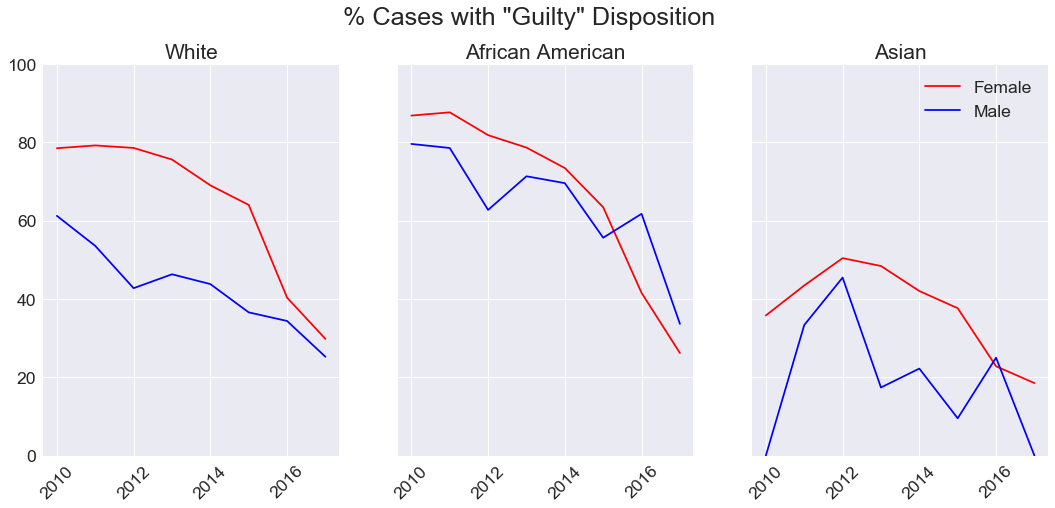

In [88]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

axs[0].plot(guilt_pct_W['F'], color="red")
axs[0].plot(guilt_pct_W['M'], color="blue")
axs[0].set_title('White')

axs[1].plot(guilt_pct_B['F'], color="red")
axs[1].plot(guilt_pct_B['M'], color="blue")
axs[1].set_title('African American')

axs[2].plot(guilt_pct_A['F'], color="red")
axs[2].plot(guilt_pct_A['M'], color="blue")
axs[2].set_title('Asian')

pylab.ylim([0,100])
fig.suptitle('% Cases with "Guilty" Disposition')
fig.autofmt_xdate(rotation =45, ha='center')
plt.gca().legend(('Female', 'Male'))

In [89]:
prost.aty_coc_lit.isnull().value_counts()

False    14683
True      1604
Name: aty_coc_lit, dtype: int64

In [90]:
prost.aty_coc_lit.value_counts()

APPOINTED DEFENSE ATTORNEY             9521
HIRED DEFENSE ATTORNEY                 4656
APPOINTED PUBLIC DEFENDER               498
APPOINTED ATTORNEY ON APPEAL              5
HIRED ATTY ON APPEAL                      2
PUBLIC DEFENDER APPOINTED ON APPEAL       1
Name: aty_coc_lit, dtype: int64

In [91]:
prost.aty_coc_lit.count()

14683

In [92]:
lawyer = prost[(prost.aty_coc_lit == 'APPOINTED DEFENSE ATTORNEY')|(prost.aty_coc_lit == 'HIRED DEFENSE ATTORNEY')|(prost.aty_coc_lit == 'APPOINTED PUBLIC DEFENDER')]
lawyer = lawyer[(lawyer.def_rac == 'A')|(lawyer.def_rac == 'B')|(lawyer.def_rac == 'W')]
lawyer.disposition[lawyer.disposition == 'GUILTY PLEA-NO JURY'] = 'CONVICTION-PLEA OF GUILTY'
#lawyer.head()

In [93]:
lawyer.disposition[(lawyer.disposition != 'CONVICTION-PLEA OF GUILTY')&(lawyer.disposition != 'DISMISSED')] = 'Other'


C:\Users\Lara\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
lawdis = lawyer.groupby(['disposition','aty_coc_lit']).size().unstack()
lawdis

aty_coc_lit,APPOINTED DEFENSE ATTORNEY,APPOINTED PUBLIC DEFENDER,HIRED DEFENSE ATTORNEY
disposition,,,
CONVICTION-PLEA OF GUILTY,7679,371,1466
DISMISSED,808,81,1509
Other,991,44,1632


In [95]:
lawpct = lawdis/lawdis.sum()*100
lawpct.columns = ['Appointed \n Defense Attorney', 'Appointed \n Public Defender', 'Hired \n Defense Attorney']
lawpct= lawpct.T
lawpct

disposition,CONVICTION-PLEA OF GUILTY,DISMISSED,Other
Appointed \n Defense Attorney,81.019202,8.525005,10.455792
Appointed \n Public Defender,74.798387,16.330645,8.870968
Hired \n Defense Attorney,31.821142,32.754504,35.424354


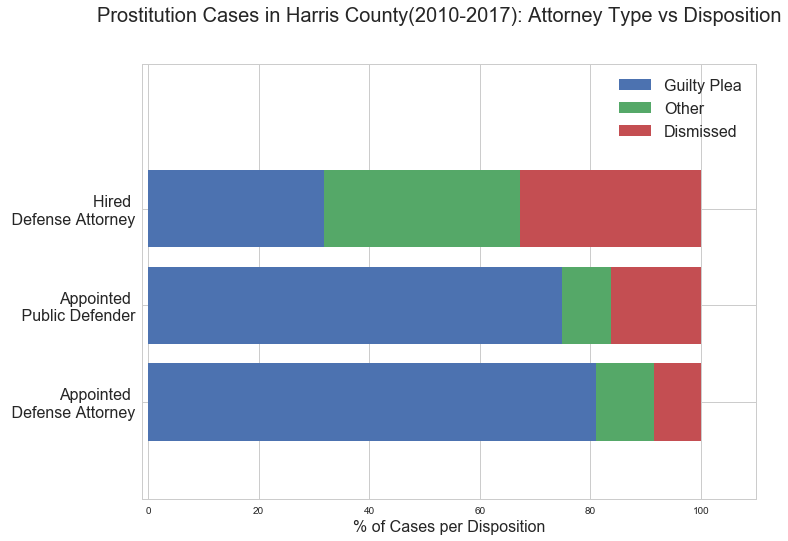

In [143]:
sns.set(style="whitegrid")

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#plot(lawpct, fig, ax)
ind = arange(lawpct.shape[0])      
ax.barh(ind, lawpct['CONVICTION-PLEA OF GUILTY'], tick_label = lawpct.index)
lefts = lawpct['CONVICTION-PLEA OF GUILTY']
ax.barh(ind, lawpct['Other'], left=lefts)
lefts = lefts + lawpct['Other']
ax.barh(ind, lawpct['DISMISSED'], left= lefts)

ax.set_ylim(-1, 3.5)
ax.set_xlim(-1,110)
ax.set_xlabel('% of Cases per Disposition', fontsize = 16)
plt.legend(['Guilty Plea', 'Other', 'Dismissed'], fontsize = 16)

fig.suptitle('Prostitution Cases in Harris County(2010-2017): Attorney Type vs Disposition', fontsize=20)
plt.setp(ax.get_yticklabels(),  fontsize=16)

fig.savefig('atty_dispo.png')
plt.show()

In [97]:
'''sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=lawpct.columns, y=lawpct.index, data=lawpct,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=lawpct,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
'''

'sns.set(style="whitegrid")\n\n# Initialize the matplotlib figure\nf, ax = plt.subplots(figsize=(6, 15))\n\n\n# Plot the total crashes\nsns.set_color_codes("pastel")\nsns.barplot(x=lawpct.columns, y=lawpct.index, data=lawpct,\n            label="Total", color="b")\n\n# Plot the crashes where alcohol was involved\nsns.set_color_codes("muted")\nsns.barplot(x="alcohol", y="abbrev", data=lawpct,\n            label="Alcohol-involved", color="b")\n\n# Add a legend and informative axis label\nax.legend(ncol=2, loc="lower right", frameon=True)\nax.set(xlim=(0, 24), ylabel="",\n       xlabel="Automobile collisions per billion miles")\nsns.despine(left=True, bottom=True)\n'

In [98]:
lawpct.index

Index(['Appointed \n Defense Attorney', 'Appointed \n Public Defender',
       'Hired \n Defense Attorney'],
      dtype='object')

In [99]:
prost.disposition.value_counts()

CONVICTION-PLEA OF GUILTY             7931
DISMISSED                             2856
GUILTY PLEA-NO JURY                   2573
DEFERRED ADJUD OF GUILT               1358
DEFERRED ADJUDICATION TERMINATED       886
DEF ADJ GLT ADJUDICATED                155
LESSER OFF. GUILTY PLEA - NO JURY      148
CONVICTION-NOLO CONTENDERE              62
UNSATISFACTORY TERMINATION              39
ACQUITTAL BY JURY                       25
CONVICTION BY JURY                      23
PROBATION TERMINATED                    18
PROBATION BY JURY TRIAL                 14
NO BILLED                               12
PROBATION-PLEA OF GUILTY                 9
NOLO CONTENDRE PLEA - NO JURY (CC)       7
NOT GUILTY PLEA - JURY VERDICT           3
PROBATION-NOLO CONTENDERE                2
GUILTY PLEA - JURY VERDICT               2
Name: disposition, dtype: int64

In [100]:
prost.aty_coc_lit.value_counts()

APPOINTED DEFENSE ATTORNEY             9521
HIRED DEFENSE ATTORNEY                 4656
APPOINTED PUBLIC DEFENDER               498
APPOINTED ATTORNEY ON APPEAL              5
HIRED ATTY ON APPEAL                      2
PUBLIC DEFENDER APPOINTED ON APPEAL       1
Name: aty_coc_lit, dtype: int64

In [101]:
lawyer.groupby(['aty_coc_lit', 'def_sex']).size().unstack()


def_sex,F,M
aty_coc_lit,,
APPOINTED DEFENSE ATTORNEY,7826,1652
APPOINTED PUBLIC DEFENDER,410,86
HIRED DEFENSE ATTORNEY,2721,1886


In [102]:
lawyer.head()

,cas,curr_off_lit,fda,bam,def_rac,def_sex,def_dob,aty_coc_lit,disposition,sentence,dispdt,comp_agency,Latitude,Longitude,judge,offcat,location,length,ageatfiling,num,date_unit,com_off_lit,disptdayofweek,filedayofweek
1,124692801010,PROSTITUTION,2010-01-06,15000.0,W,F,1970-08-19,APPOINTED DEFENSE ATTORNEY,CONVICTION-PLEA OF GUILTY,90 DAYS HCJ,2010-01-07,HOUSTON POLICE DEPARTMENT,29.833946,-95.344197,Herb Ritchie,Prostitution,HCJ,90 DAYS,39.0,90.0,DAYS,PROSTITUTION,3.0,2
2,124699801010,PROSTITUTION,2010-01-06,15000.0,W,F,1975-06-07,APPOINTED DEFENSE ATTORNEY,CONVICTION-PLEA OF GUILTY,6 MONTHS STATE JAIL,2010-01-08,HOUSTON POLICE DEPARTMENT,30.152021,-95.310683,George Powell,Prostitution,STATE JAIL,6 MONTHS,34.0,360.0,DAYS,PROSTITUTION,4.0,2
3,124706301010,PROSTITUTION,2010-01-06,15000.0,B,F,1968-07-05,APPOINTED DEFENSE ATTORNEY,CONVICTION-PLEA OF GUILTY,6 MONTHS STATE JAIL,2010-01-26,HOUSTON POLICE DEPARTMENT,29.774657,-95.321091,Kelli Johnson,Prostitution,STATE JAIL,6 MONTHS,41.0,360.0,DAYS,PROSTITUTION,1.0,2
4,124708201010,PROSTITUTION,2010-01-07,15000.0,W,F,1969-09-30,APPOINTED DEFENSE ATTORNEY,CONVICTION-PLEA OF GUILTY,6 MONTHS STATE JAIL,2010-01-08,HOUSTON POLICE DEPARTMENT,29.796297,-95.491702,Jeannine Barr,Prostitution,STATE JAIL,6 MONTHS,40.0,360.0,DAYS,PROSTITUTION,4.0,3
5,124708501010,PROSTITUTION,2010-01-07,15000.0,B,F,1963-05-03,APPOINTED DEFENSE ATTORNEY,CONVICTION-PLEA OF GUILTY,180 DAYS HCJ,2010-01-11,HOUSTON POLICE DEPARTMENT,29.752092,-95.351306,Denise Collins,Prostitution,HCJ,180 DAYS,46.0,180.0,DAYS,PROSTITUTION,0.0,3


In [103]:
lawR= lawyer.groupby(['aty_coc_lit', 'def_rac']).size().unstack()
lawR

def_rac,A,B,W
aty_coc_lit,,,
APPOINTED DEFENSE ATTORNEY,106,5277,4095
APPOINTED PUBLIC DEFENDER,3,304,189
HIRED DEFENSE ATTORNEY,986,1197,2424


In [104]:
lawRS= lawyer.groupby(['aty_coc_lit', 'def_rac', 'def_sex']).size().unstack()
lawRS

def_sex                                F     M
aty_coc_lit                def_rac            
APPOINTED DEFENSE ATTORNEY A          93    13
                           B        4143  1134
                           W        3590   505
APPOINTED PUBLIC DEFENDER  A           1     2
                           B         231    73
                           W         178    11
HIRED DEFENSE ATTORNEY     A         914    72
                           B         673   524
                           W        1134  1290

In [105]:
lawR.head()

def_rac,A,B,W
aty_coc_lit,,,
APPOINTED DEFENSE ATTORNEY,106,5277,4095
APPOINTED PUBLIC DEFENDER,3,304,189
HIRED DEFENSE ATTORNEY,986,1197,2424


In [106]:
femtot = lawRS.F.unstack()
femtot.columns = ['Asian', 'African American', 'White']
femtot

,Asian,African American,White
aty_coc_lit,,,
APPOINTED DEFENSE ATTORNEY,93,4143,3590
APPOINTED PUBLIC DEFENDER,1,231,178
HIRED DEFENSE ATTORNEY,914,673,1134


In [107]:
fempct = (femtot/femtot.sum()*100).T
fempct.columns = ['one', 'two', 'Female']
fempct

,one,two,Female
Asian,9.226190,0.099206,90.674603
African American,82.088369,4.576976,13.334654
White,73.235414,3.631171,23.133415


In [108]:
mantot = lawRS.M.unstack()
mantot.columns = ['Asian', 'African American', 'White']
manpct = (mantot/mantot.sum()*100).T
manpct.columns = ['one', 'two', 'Male']
manpct

,one,two,Male
Asian,14.942529,2.298851,82.758621
African American,65.511265,4.217215,30.271519
White,27.962348,0.609081,71.428571


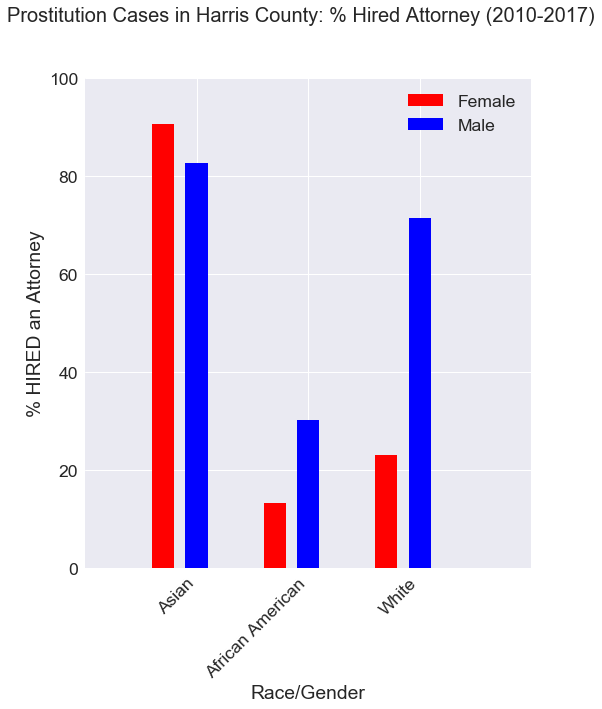

In [109]:
fig = plt.figure(figsize=(8,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.2

fempct[['Female']].plot(kind='bar', color= 'red', ax=ax, width=width, position=2)
manpct[['Male']].plot(kind='bar', color = 'blue', ax=ax, width=width, position=0.5)

ax.set_xlim(-1, 3)
ax.set_ylim(0, 100)

ax.set_ylabel('% HIRED an Attorney')
ax.set_xlabel('Race/Gender')

fig.autofmt_xdate(rotation =45, ha='right')

#axe.set_title(title)
fig.suptitle('Prostitution Cases in Harris County: % Hired Attorney (2010-2017)', fontsize=20)

#params = {'legend.fontsize': 20,
#          'legend.handlelength': 2}
#plt.rcParams.update(params)

plt.show()
fig.savefig('atty_race_gender.png')

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [111]:
features = [
 #   'cas',
 #'curr_off_lit',
 #'fda',
 #'bam',
 'def_rac',
 'def_sex',
 #'def_dob',
 'aty_coc_lit',
 #'disposition',
 #'sentence',
 #'dispdt',
 #'comp_agency',
 #'Latitude',
 #'Longitude',
 #'judge',
 #'offcat',
 #'location',
 #'length',
 #'ageatfiling',
 #'num',
 #'date_unit',
 #'com_off_lit',
 #'disptdayofweek',
 #'filedayofweek'
]

In [112]:
xvar = lawyer[features]
xvar= pd.get_dummies(xvar, columns= ['def_sex', 'def_rac', 'aty_coc_lit'])

In [113]:
xvar.head()

,def_sex_F,def_sex_M,def_rac_A,def_rac_B,def_rac_W,aty_coc_lit_APPOINTED DEFENSE ATTORNEY,aty_coc_lit_APPOINTED PUBLIC DEFENDER,aty_coc_lit_HIRED DEFENSE ATTORNEY
1,1,0,0,0,1,1,0,0
2,1,0,0,0,1,1,0,0
3,1,0,0,1,0,1,0,0
4,1,0,0,0,1,1,0,0
5,1,0,0,1,0,1,0,0


In [114]:
#yvar, get dummies on dispot
yvar= pd.get_dummies(lawyer['disposition'])
yvar.head()

,CONVICTION-PLEA OF GUILTY,DISMISSED,Other
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [115]:
reg = LinearRegression().fit(xvar, yvar)
reg.score(xvar, yvar)

0.15927992720635148

In [116]:
reg.coef_

array([[ -1.22602952e+12,  -1.22602952e+12,   2.85708381e+12,
          2.85708381e+12,   2.85708381e+12,   3.46080713e+11,
          3.46080713e+11,   3.46080713e+11],
       [  9.72122418e+11,   9.72122418e+11,  -2.50374875e+12,
         -2.50374875e+12,  -2.50374875e+12,  -1.13832414e+12,
         -1.13832414e+12,  -1.13832414e+12],
       [  2.53907106e+11,   2.53907106e+11,  -3.53335059e+11,
         -3.53335059e+11,  -3.53335059e+11,   7.92243430e+11,
          7.92243430e+11,   7.92243430e+11]])

In [117]:
reg.coef_.shape

(3, 8)

In [118]:
lr_coef =pd.DataFrame(reg.coef_, columns = xvar.columns, index=yvar.columns).round(4)*100
lr_coef = lr_coef.T
lr_coef.sort_values('CONVICTION-PLEA OF GUILTY')

,CONVICTION-PLEA OF GUILTY,DISMISSED,Other
def_sex_M,-1.226030e+14,9.721224e+13,2.539071e+13
def_sex_F,-1.226030e+14,9.721224e+13,2.539071e+13
aty_coc_lit_HIRED DEFENSE ATTORNEY,3.460807e+13,-1.138324e+14,7.922434e+13
aty_coc_lit_APPOINTED PUBLIC DEFENDER,3.460807e+13,-1.138324e+14,7.922434e+13
aty_coc_lit_APPOINTED DEFENSE ATTORNEY,3.460807e+13,-1.138324e+14,7.922434e+13
def_rac_A,2.857084e+14,-2.503749e+14,-3.533351e+13
def_rac_W,2.857084e+14,-2.503749e+14,-3.533351e+13
def_rac_B,2.857084e+14,-2.503749e+14,-3.533351e+13


In [119]:
#trial = xtrain.join(ytrain)

corrme = xvar.copy()
corrme['CONVICTION-PLEA OF GUILTY'] = yvar['CONVICTION-PLEA OF GUILTY']
corrme['DISMISSED'] = yvar['DISMISSED']
corrme['Other'] = yvar['Other']

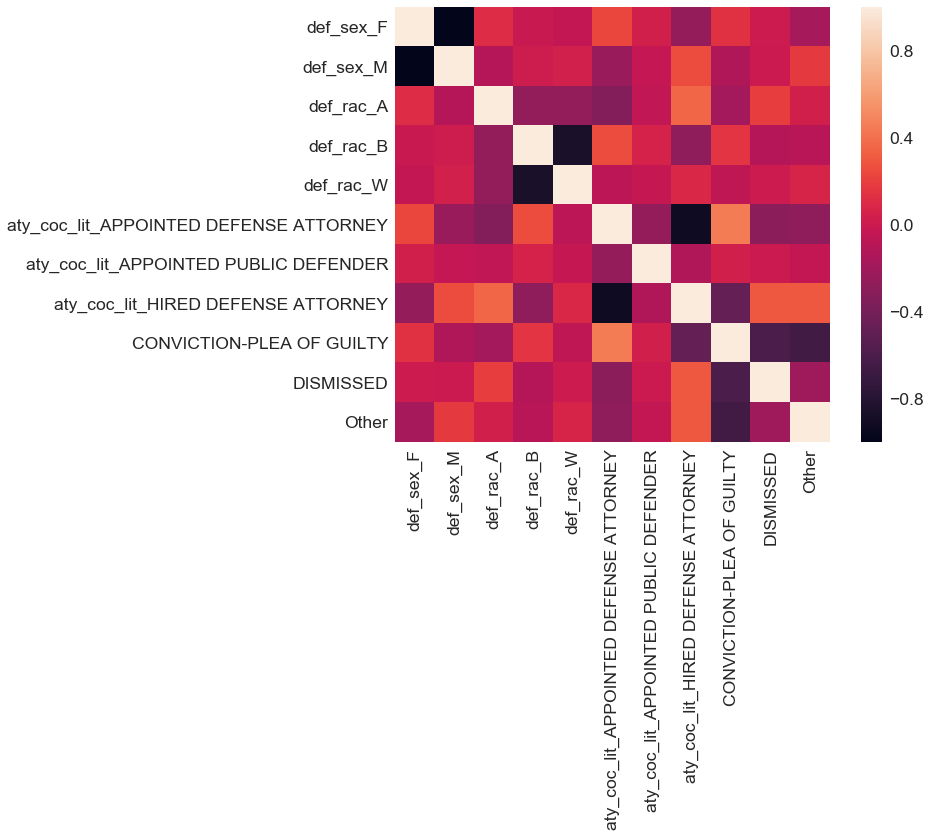

In [120]:
corrmat= corrme.corr ()
sns.heatmap(corrmat, square=True)

In [121]:
from sklearn import preprocessing as pp
from sklearn import linear_model as lm

#change scale of data to range of 0 to 1
scaler = pp.MinMaxScaler()
scale = pd.DataFrame(scaler.fit_transform(corrme), columns= corrme.columns, index = corrme.index)
#Set up IV matrix and DV array to test model accuracy
dv = yvar.columns
for var in dv:
    print(var)
    y = pd.DataFrame()
    y = scale[var]
    X = scale.copy()
    del X[var]
    print(X.head())

sgdr = lm.SGDRegressor(max_iter=1000)  # or any sklearn regressor that you like
sgdr.fit(X,y)
sgdr.score(X, y)

CONVICTION-PLEA OF GUILTY
   def_sex_F  def_sex_M  def_rac_A  def_rac_B  def_rac_W  \
1        1.0        0.0        0.0        0.0        1.0   
2        1.0        0.0        0.0        0.0        1.0   
3        1.0        0.0        0.0        1.0        0.0   
4        1.0        0.0        0.0        0.0        1.0   
5        1.0        0.0        0.0        1.0        0.0   

   aty_coc_lit_APPOINTED DEFENSE ATTORNEY  \
1                                     1.0   
2                                     1.0   
3                                     1.0   
4                                     1.0   
5                                     1.0   

   aty_coc_lit_APPOINTED PUBLIC DEFENDER  aty_coc_lit_HIRED DEFENSE ATTORNEY  \
1                                    0.0                                 0.0   
2                                    0.0                                 0.0   
3                                    0.0                                 0.0   
4                     

0.99999754028885035

In [122]:
# $5646.862526 is the 7th most common bail amount in Prostitution cases with 605 occurances from 2010-2017
prost.bam.value_counts().sort_values()

2090.000000         1
6010.000000         1
250000.000000       1
14090.000000        1
500000.000000       1
4601.000000         1
800000.000000       1
12010.000000        1
20400.000000        1
2501.000000         1
20040.000000        1
20030.000000        1
4090.000000         1
1091.000000         1
5010.000000         1
611.000000          1
1022.000000         1
2400.000000         1
6002.000000         1
1100.000000         1
20.000000           1
40.000000           1
30010.000000        1
5020.000000         1
800.000000          1
7501.000000         1
10030.000000        1
606.000000          1
503.000000          1
3030.000000         1
                 ... 
2001.000000         7
100000.000000       7
7000.000000         8
501.000000          9
8000.000000        10
2020.000000        10
888888.000000      11
50000.000000       13
5005.000000        14
30000.000000       19
1001.000000        19
35000.000000       24
6000.000000        25
25000.000000       27
1010.00000